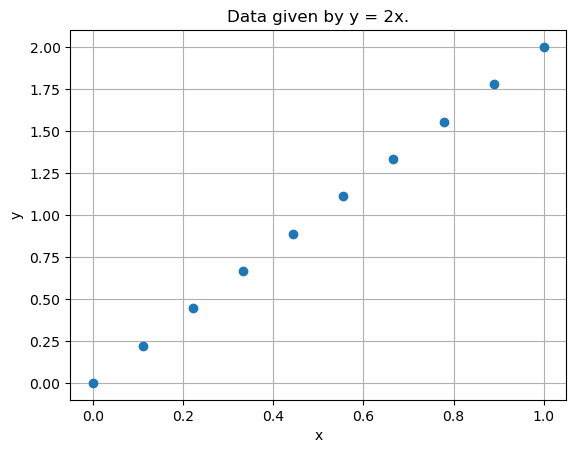

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define arbitrarly x
x = np.linspace(0, 1, 10)
y = 2 * x

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

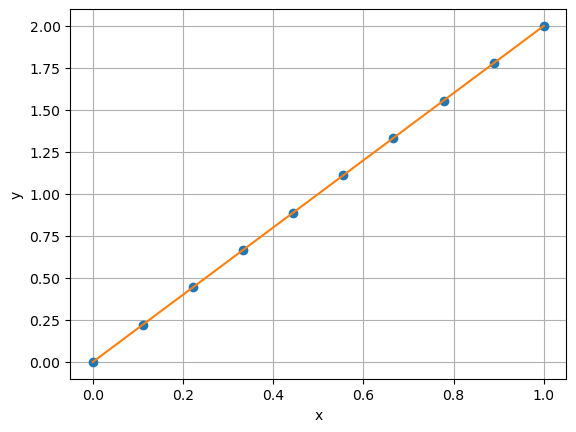

In [2]:
# Define a function f(x, theta) such that:
# f(x, theta) = theta_1 + theta_2 * x
def f(x, theta):
    return theta[0] + theta[1] * x

# Visualize (on the same plot with the data) the function
# f(x, theta) for a user-defined vector theta.
theta = [0, 2]
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

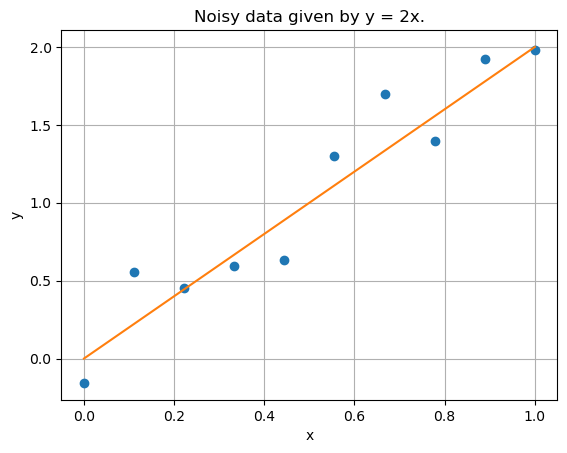

In [3]:
# Consider a little bit of noise
y_noisy = y + np.random.normal(loc=0, scale=0.2, size=y.shape)

# Visualize the noisy data
theta = [0, 2]
plt.plot(x, y_noisy, 'o')
plt.plot(x, f(x, theta))
plt.title("Noisy data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

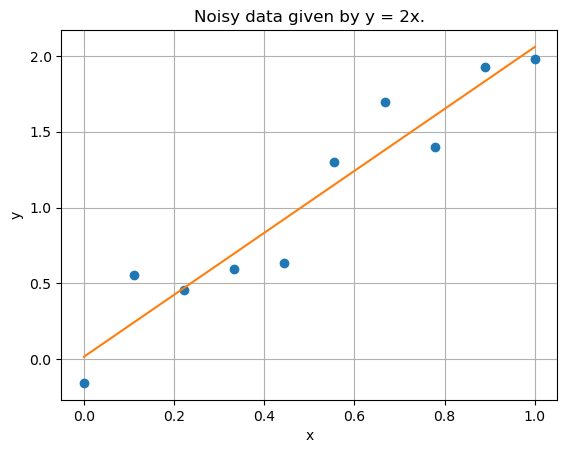

In [4]:
# Given x and y_noisy, define the matrices X and Y as in the
# notes.
N = x.shape[0]

X = np.ones((2, N))
X[1] = x
Y = y_noisy

# Solve Normal Equations XX^T theta = XY
# Suggested: use Cholesky
L = np.linalg.cholesky(X @ X.T)

## First step: solve Lz = XY
z = np.linalg.solve(L, X @ Y)

## Second step: solve L^T theta = z
theta = np.linalg.solve(L.T, z)
plt.plot(x, y_noisy, 'o')
plt.plot(x, f(x, theta))
plt.title("Noisy data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("./data/poly_regression_large.csv")
x, y = data["x"], data["y"]

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Complex data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/poly_regression_large.csv'

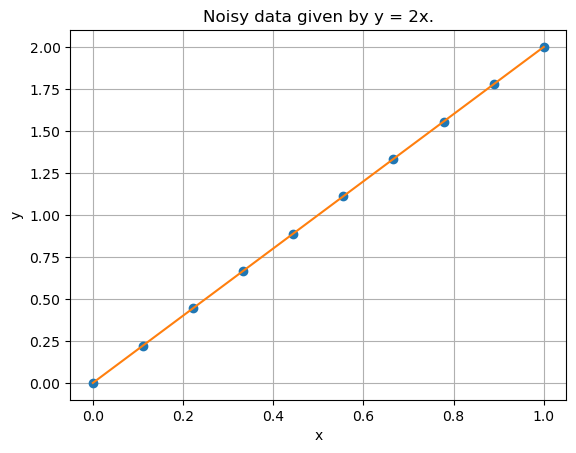

In [6]:
def f(x, theta):
    return theta[0] + theta[1] * x

# Given x and y_noisy, define the matrices X and Y as in the
# notes.
N = x.shape[0]

X = np.ones((2, N))
X[1] = x
Y = y

# Solve Normal Equations XX^T theta = XY
# Suggested: use Cholesky
L = np.linalg.cholesky(X @ X.T)

## First step: solve Lz = XY
z = np.linalg.solve(L, X @ Y)

## Second step: solve L^T theta = z
theta = np.linalg.solve(L.T, z)
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta))
plt.title("Noisy data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

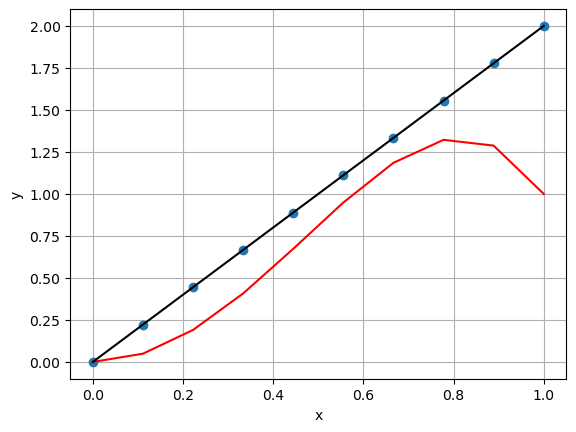

In [7]:
# Define polynomial matrix PhiX and Y
def vandermonde(x, K):
    # Returns PhiX of degree K
    PhiX = np.zeros((K, N))
    for j in range(K):
        PhiX[j, :] = x**j
    return PhiX

def f(x, theta):
    y = 0
    for j in range(len(theta)):
        y = y + theta[j] * x**j
    return y

PhiX = vandermonde(x, K=10)
Y = y

# Solve normal equations associated with this problem with cholesky and
# visualize the result (copy-paste)
L = np.linalg.cholesky(PhiX @ PhiX.T)

## First step: solve Lz = XY
z = np.linalg.solve(L, PhiX @ Y)

## Second step: solve L^T theta = z
theta = np.linalg.solve(L.T, z)
theta_true = [0, 0, 4, 0, -3]
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta_true), 'r')
plt.plot(x, f(x, theta), 'k')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [8]:
import numpy as np

def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling
    
    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

In [9]:
def f(x, theta):
    y = 0
    for j in range(len(theta)):
        y = y + theta[j] * x**j
    return y

def loss(theta, X, y):
    y_pred = f(X, theta)
    error = np.square(y_pred - y)
    return np.mean(error)

def grad_loss(theta, X, y):
    N = len(y)
    return 2/N * (f(X, theta) - y)
